In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def barchart(title_attr_csv_dir, attr, attr_num):
    title_attr_df = pd.read_csv(title_attr_csv_dir, encoding = "utf8")
    attr_anime_count = title_attr_df.sum(axis = 0, numeric_only =True)
    popular_attr = attr_anime_count.nlargest(attr_num)
    popular_attr_list = popular_attr.index.tolist()
    attr_anime_dict = {}
    for attr in popular_attr_list:
        attr_anime_dict[attr] = title_attr_df.loc[title_attr_df[attr] == 1]['title'].tolist()

    popular_attr.plot.bar(x = attr, y = 'Anime', rot = 75)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    return attr_anime_dict

In [3]:
def occurence_heatmap(attr1_anime_dict, attr2_anime_dict, attr1, attr2):
    attr1_attr2_dict = {}
    for attr2, anime_list2 in attr2_anime_dict.items():
        attr1_attr2_dict[attr2] = {}
        for attr1, anime_list1 in attr1_anime_dict.items():
            attr1_attr2_dict[attr2][attr1] = len([i for i in anime_list1 if i in anime_list2])    

    attr1_attr2_df = pd.DataFrame.from_dict(attr1_attr2_dict)

    
    sns.heatmap(data = attr1_attr2_df, annot = True, fmt = 'g')
    plt.xticks(fontsize=14,rotation = 80)
    plt.yticks(fontsize=14)

# Barcharts

## Genres

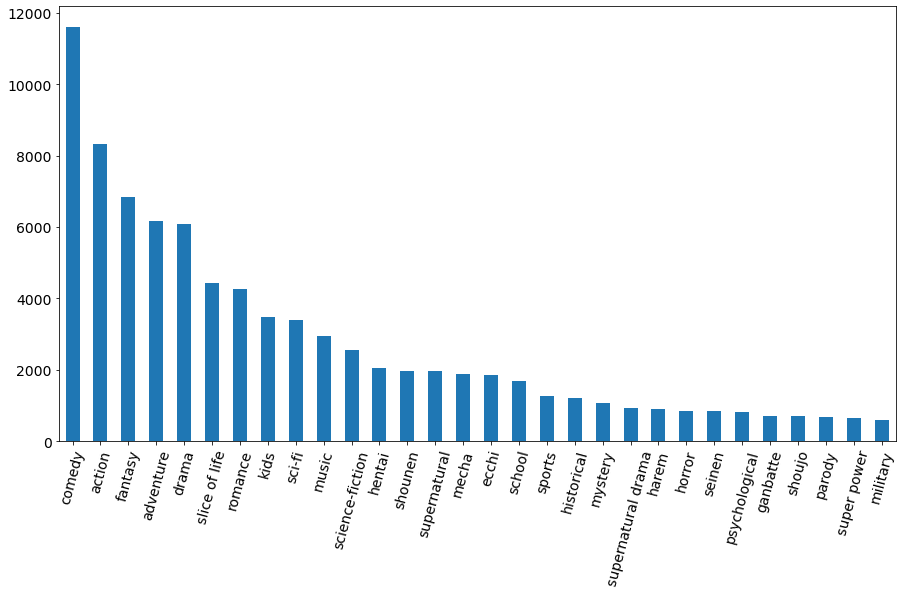

In [4]:
fig = plt.figure(figsize = (15,8))
genre_anime_dict = barchart('../data/csv/title_genres.csv', 'genre', 30)
plt.show()

## Studios

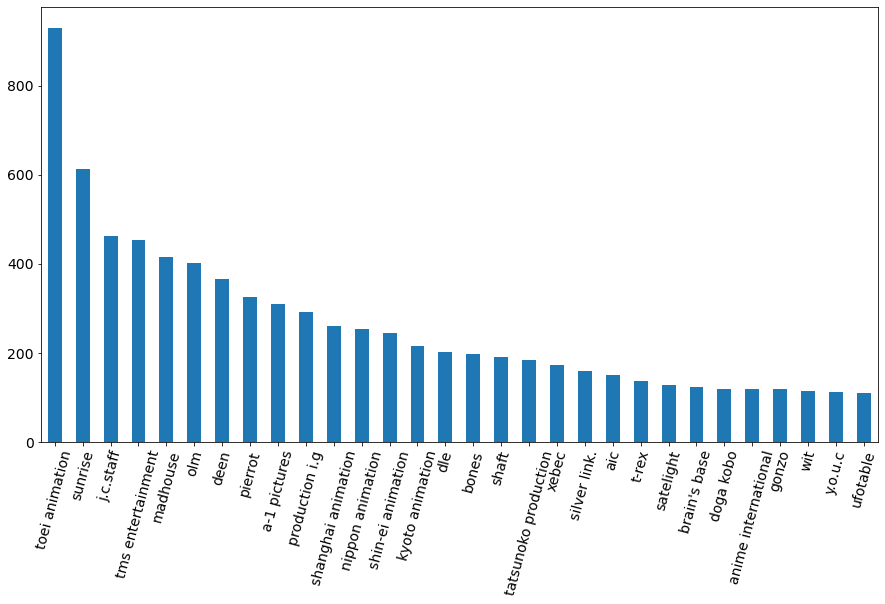

In [5]:
fig = plt.figure(figsize = (15,8))
studio_anime_dict = barchart('../data/csv/title_studios.csv', 'studio', 30)
plt.show()

## Voice actors

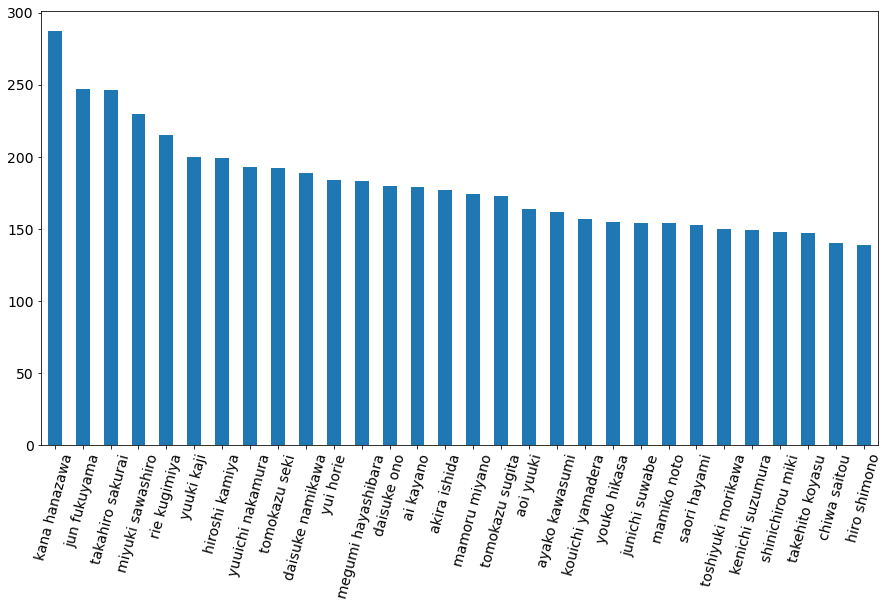

In [6]:
fig = plt.figure(figsize = (15,8))
actor_anime_dict = barchart('../data/csv/title_voice_actors.csv', 'actor', 30)
plt.show()

# Heatmaps

## Genres vs studio

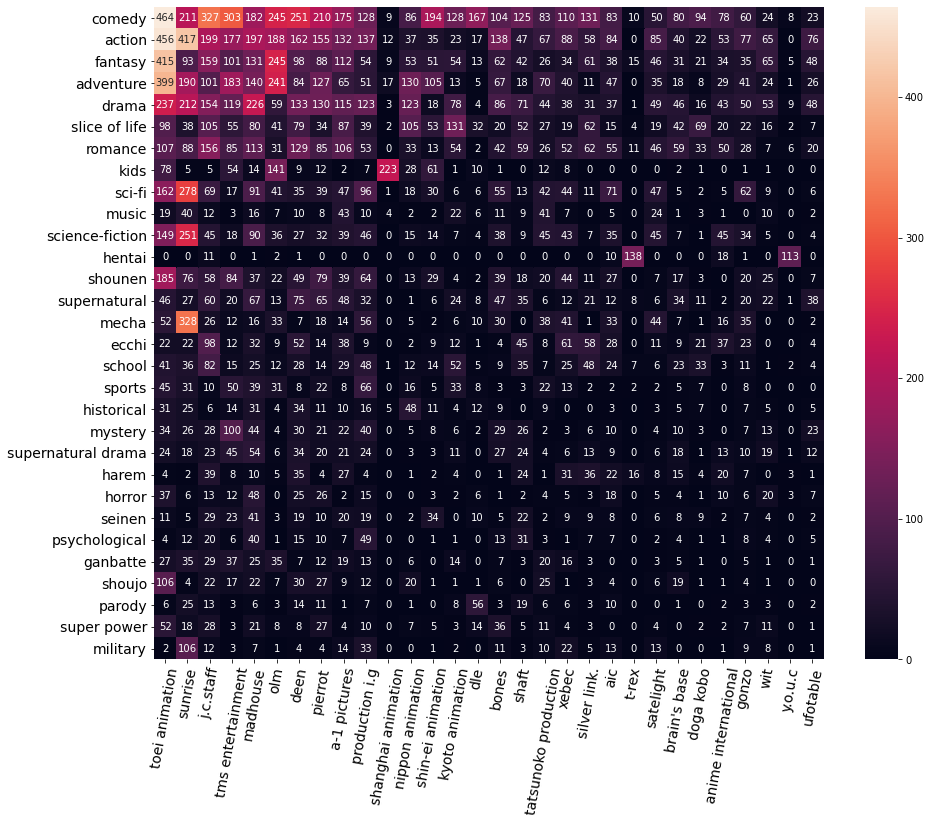

In [7]:
fig = plt.figure(figsize = (15,12))
occurence_heatmap(genre_anime_dict, studio_anime_dict, 'genre', 'studio')
plt.show()

## Insights

#### Genre:
* Comedy is not just the most popular genre, but also the focus of most big studios
* Some studios specialize in hentai, while others avoid this. Ecchi, on the other hand, is not as repelled.
* Eventhough it is a common belief that anime are for children, the kids genre shows that it is not the most popular genre. Furthermore, only a small portion of studios focus on making anime that target child audiences.
#### Studio's specialization:
* Shanghai studio: kid
* Sunrise: Mecha, sci-fi, military, action => Fighting robots
* Kyoani: Slice of life, school, romance, drama, comedy - but not shoujo (not girl's anime)! 
> => It's not GEI to stan for Kyoani's SoL!
* dle studio: Comedic parody


## Actors vs studios

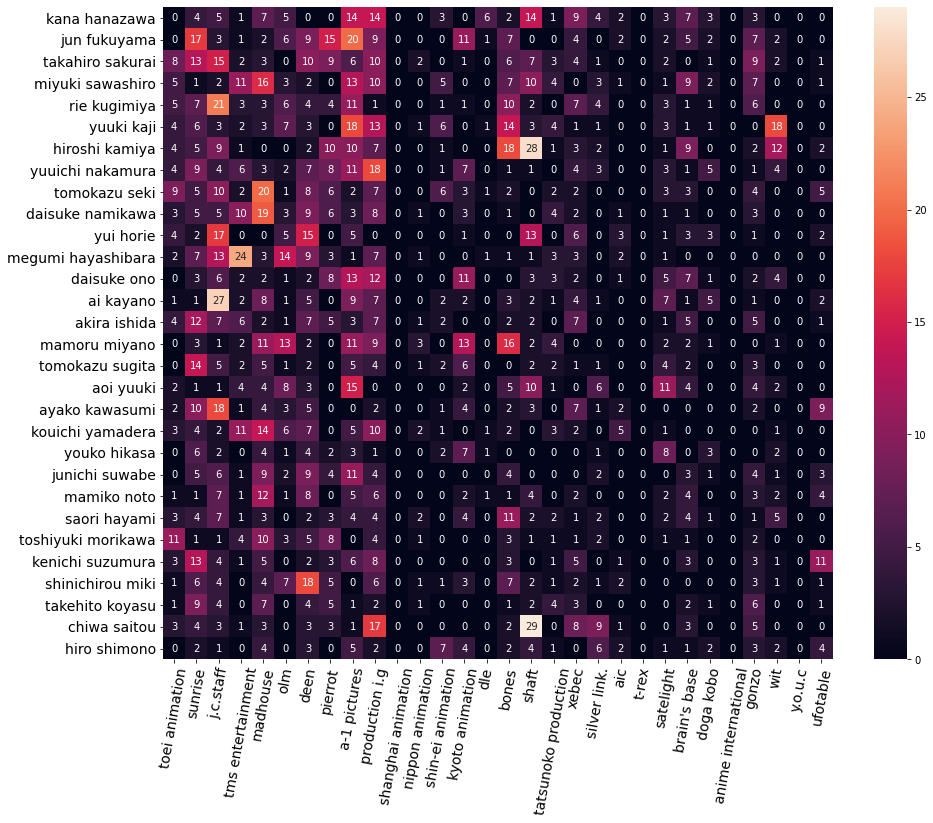

In [10]:
fig = plt.figure(figsize = (15,12))
occurence_heatmap( actor_anime_dict, studio_anime_dict,'actor','studio')
plt.show()

### Insights

* Eventhough toei animation produces the most anime, they don't hire many renowned voice actors like other big studios
* There are some actors that are frequently recruited by one studio: JC Staff & Ai Yakano, Shaft & Hiroshi Kamiya, Chiwa Saitou
* The famous voice actors don't work have any colaboration with shanghai animation, t-rex and y.o.u.c, maybe because of their speciality? Discuss more in Genre vs actor


## Genre vs actors

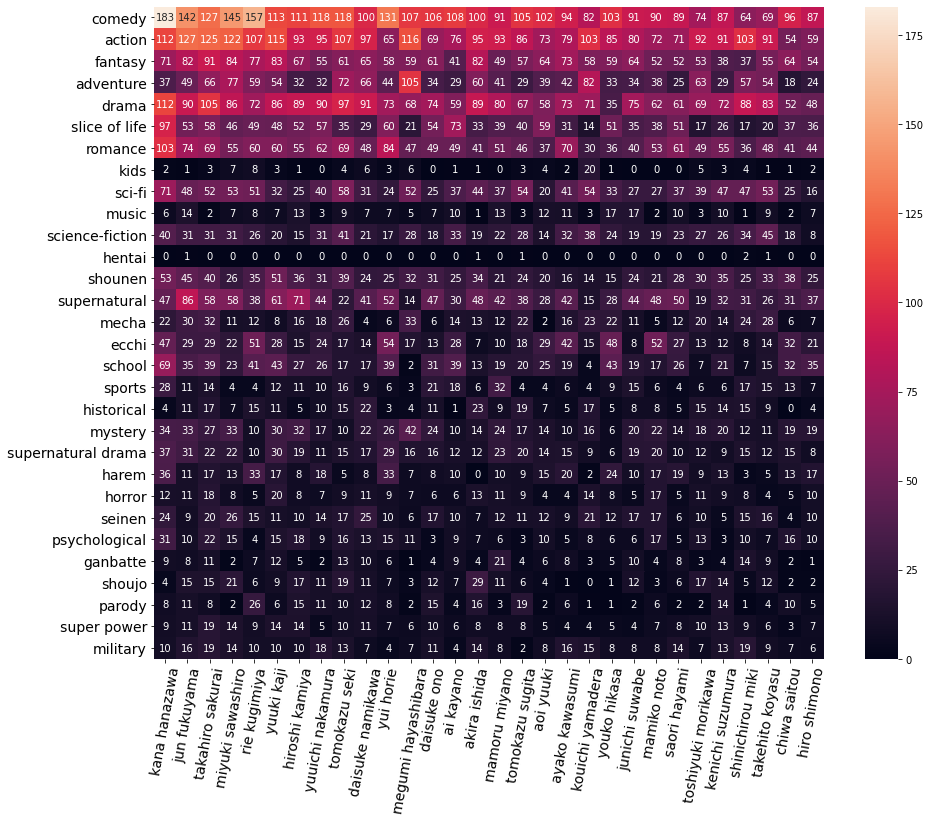

In [9]:
fig = plt.figure(figsize = (15,12))
occurence_heatmap(genre_anime_dict, actor_anime_dict, 'genre', 'actor')
plt.show()

* Only a few kid anime are voiced by famous voice actors
* For hentai, only five names have 1 to 2 works in this genre. Furthermore, all those 5 (Jun Fukuyama, Akira Ishida, Tomokazu Sugita, Shinichirou Miki, Takehito Koyasu) are MALE!